In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_dataset.csv')
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


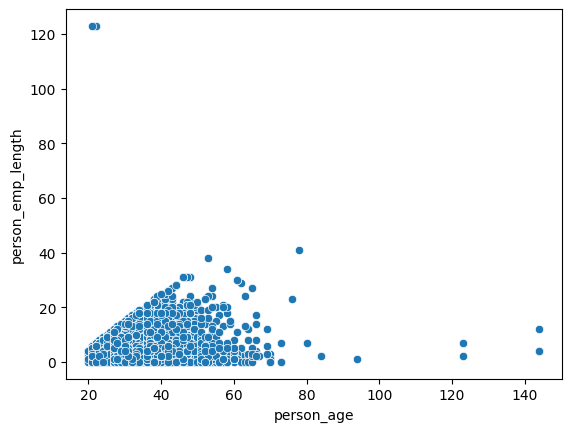

In [23]:
sns.scatterplot(x=df['person_age'], y=df['person_emp_length'], data=df)
plt.show()

In [24]:
mean = df['person_age'].mean()
std = df['person_age'].std()
print (mean)
print(std)

27.73459992019889
6.348078419225359


In [25]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df[(df['person_age'] < limite_inferior) | (df['person_age'] > limite_superior)]

In [26]:
df_filtrado = df[(df['person_age'] >= limite_inferior) & (df['person_age'] <= limite_superior)]
print(df[(df['person_age'] >= limite_inferior) & (df['person_age'] <= limite_superior)])

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32294          36          92000              MORTGAGE               18.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [27]:
mean = df_filtrado['person_emp_length'].mean()
std = df_filtrado['person_emp_length'].std()
print (mean)
print(std)

4.769574153767102
4.0846916802918996


In [28]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df_filtrado[(df['person_emp_length'] < limite_inferior) | (df_filtrado['person_emp_length'] > limite_superior)]


C:\Users\alenm\AppData\Local\Temp\ipykernel_20400\2616583654.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_filtrado[(df['person_emp_length'] < limite_inferior) | (df_filtrado['person_emp_length'] > limite_superior)]


In [29]:
df_filtrado = df_filtrado[(df['person_emp_length'] >= limite_inferior) & (df_filtrado['person_emp_length'] <= limite_superior)]

C:\Users\alenm\AppData\Local\Temp\ipykernel_20400\3588448294.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[(df['person_emp_length'] >= limite_inferior) & (df_filtrado['person_emp_length'] <= limite_superior)]


<Axes: >

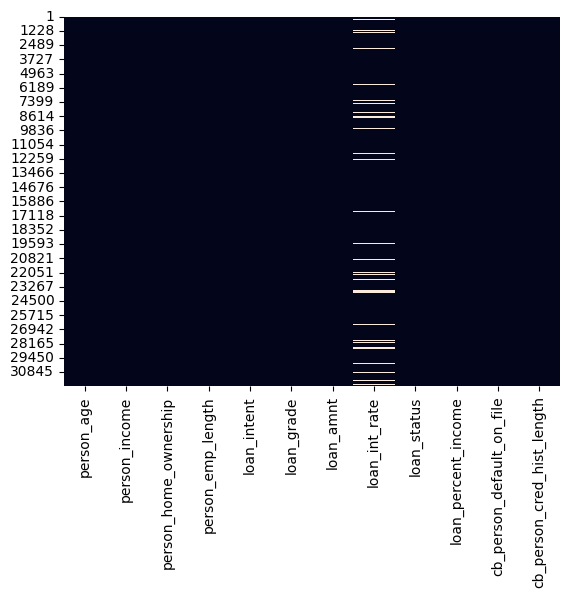

In [30]:
sns.heatmap(df_filtrado.isnull(), cbar=False)

In [31]:
def verificar_nulos_por_columna():
  for column in df_filtrado.columns:
    print(f'Columna: {column}')
    print(f'Cantidad de nulos: {df_filtrado[column].isnull().sum()}')
    print(f'% de nulos: {df_filtrado[column].isnull().sum() / len(df_filtrado[column]) * 100}%')
    print()

verificar_nulos_por_columna()

Columna: person_age
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_home_ownership
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_emp_length
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_intent
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_grade
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_amnt
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_int_rate
Cantidad de nulos: 2955
% de nulos: 9.57550226830849%

Columna: loan_status
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_percent_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_default_on_file
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_cred_hist_length
Cantidad de nulos: 0
% de nulos: 0.0%



In [32]:
# Corrijo los nulos de person_emp_length usando interpolación lineal
df_filtrado['person_emp_length'] = df_filtrado['person_emp_length'].interpolate()

# Corrijo los nulos de loan_int_rate usando interpolación lineal
df_filtrado['loan_int_rate'] = df_filtrado['loan_int_rate'].interpolate()

verificar_nulos_por_columna()

Columna: person_age
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_home_ownership
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_emp_length
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_intent
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_grade
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_amnt
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_int_rate
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_status
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_percent_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_default_on_file
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_cred_hist_length
Cantidad de nulos: 0
% de nulos: 0.0%



<Axes: >

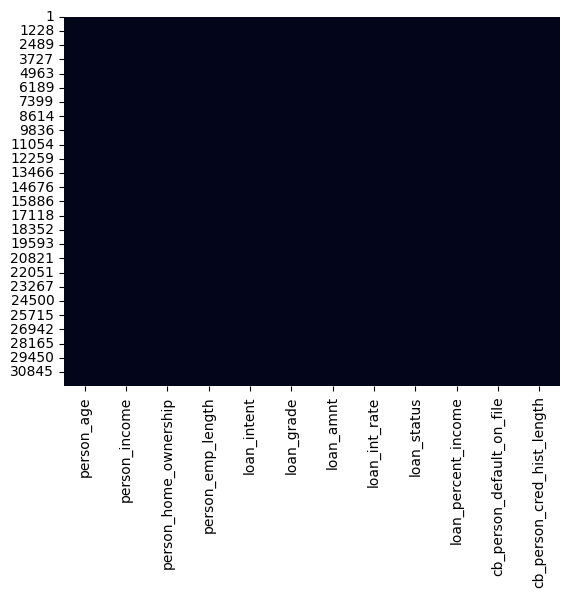

In [33]:
sns.heatmap(df_filtrado.isnull(), cbar=False)

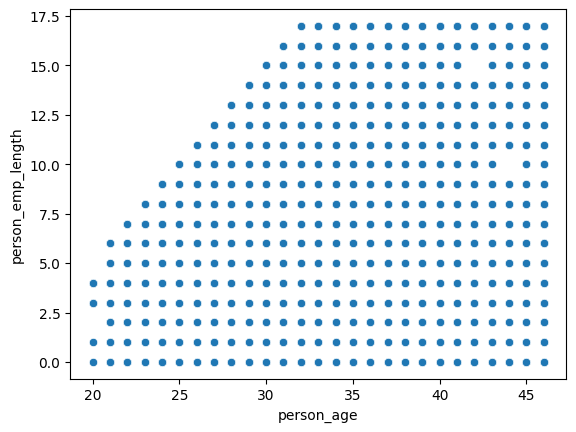

In [34]:

sns.scatterplot(x=df_filtrado['person_age'], y=df_filtrado['person_emp_length'], data=df_filtrado)
plt.show()

<Axes: xlabel='person_age', ylabel='person_income'>

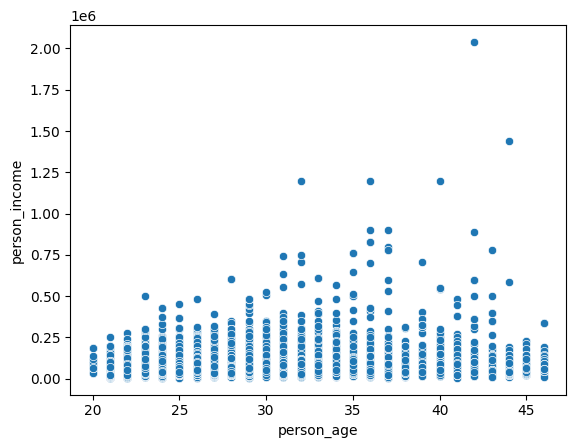

In [35]:
sns.scatterplot(x=df_filtrado['person_age'], y=df_filtrado['person_income'], data=df_filtrado)


In [36]:
valores_unicos = df_filtrado['loan_intent'].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


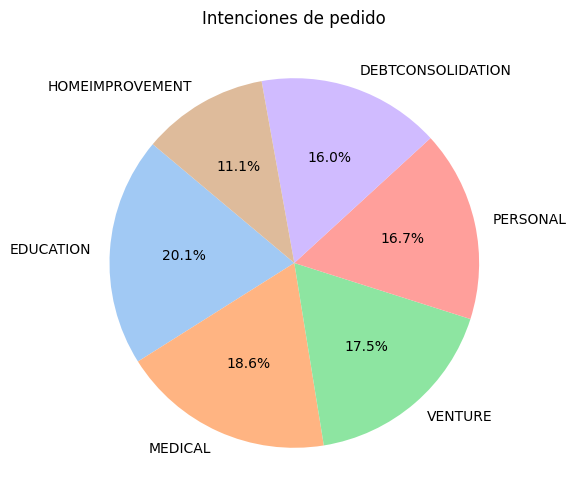

In [37]:
total_loan_intents = df_filtrado['loan_intent'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_intents))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_intents, labels=total_loan_intents.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Intenciones de pedido")
plt.show()

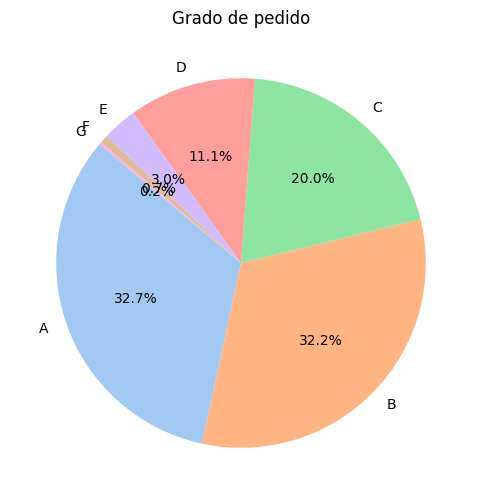

In [38]:
total_loan_grade = df_filtrado['loan_grade'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_grade))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_grade, labels=total_loan_grade.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Grado de pedido")
plt.show()

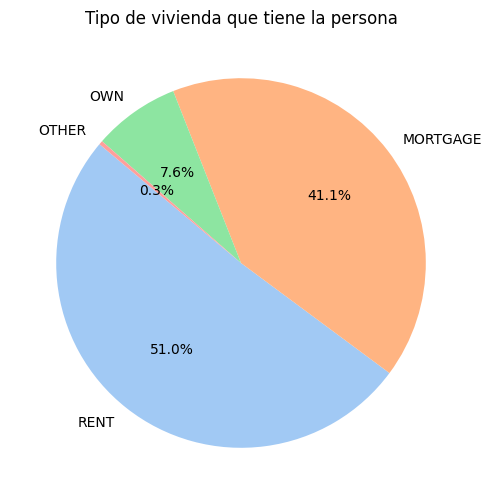

In [39]:
total_person_home_ownership = df_filtrado['person_home_ownership'].value_counts()
colores = sns.color_palette("pastel", len(total_person_home_ownership))

plt.figure(figsize=(8, 6))
plt.pie(total_person_home_ownership, labels=total_person_home_ownership.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Tipo de vivienda que tiene la persona")
plt.show()

In [40]:
print(df_filtrado.to_string())

       person_age  person_income person_home_ownership  person_emp_length        loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length
1              21           9600                   OWN                5.0          EDUCATION          B       1000      11.140000            0                 0.10                         N                           2
2              25           9600              MORTGAGE                1.0            MEDICAL          C       5500      12.870000            1                 0.57                         N                           3
3              23          65500                  RENT                4.0            MEDICAL          C      35000      15.230000            1                 0.53                         N                           2
4              24          54400                  RENT                8.0            MEDICAL          C      35000      14.27000

In [41]:
df_filtrado.to_csv('filtrado.csv', index=False)


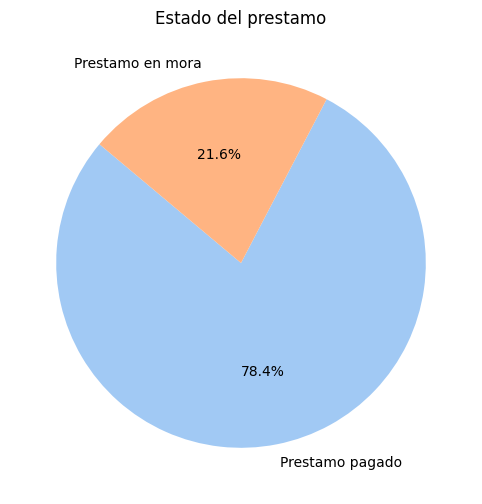

In [42]:
df_prestamos = df_filtrado['loan_status'].replace({0: 'Prestamo pagado', 1: 'Prestamo en mora'})

total_loan_status = df_prestamos.value_counts()
colores = sns.color_palette("pastel", len(total_loan_status))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_status, labels=total_loan_status.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Estado del prestamo")
plt.show()

In [43]:
cantidad = df_filtrado['loan_status'].value_counts()
print(cantidad)

loan_status
0    24208
1     6652
Name: count, dtype: int64


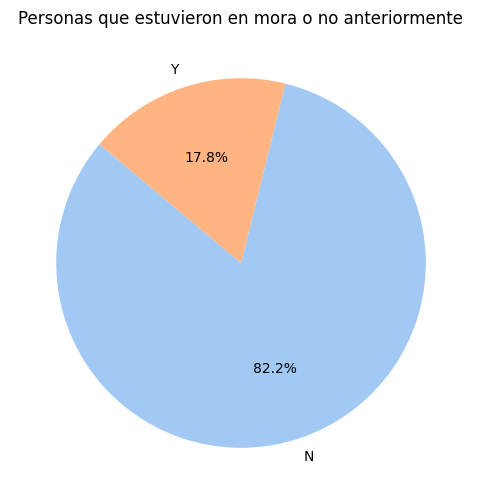

In [44]:
df_anteriores = df_filtrado['cb_person_default_on_file'].replace({1: 'Estuvo en mora', 0: 'No estuvo en mora'})


# Contar los valores después del reemplazo
total_cb_person_default_on_file = df_anteriores.value_counts()

# Asignar colores para el gráfico
colores = sns.color_palette("pastel", len(total_cb_person_default_on_file))

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(total_cb_person_default_on_file, labels=total_cb_person_default_on_file.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Personas que estuvieron en mora o no anteriormente")
plt.show()


In [45]:
cantidad = df_filtrado['cb_person_default_on_file'].value_counts()
print(cantidad)

cb_person_default_on_file
N    25380
Y     5480
Name: count, dtype: int64


In [46]:
cantidad_total = df_filtrado[(df['loan_status'] == 1) & (df['cb_person_default_on_file'] == 'N')]
print(len(cantidad_total))

4595


C:\Users\alenm\AppData\Local\Temp\ipykernel_20400\849212955.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cantidad_total = df_filtrado[(df['loan_status'] == 1) & (df['cb_person_default_on_file'] == 'N')]


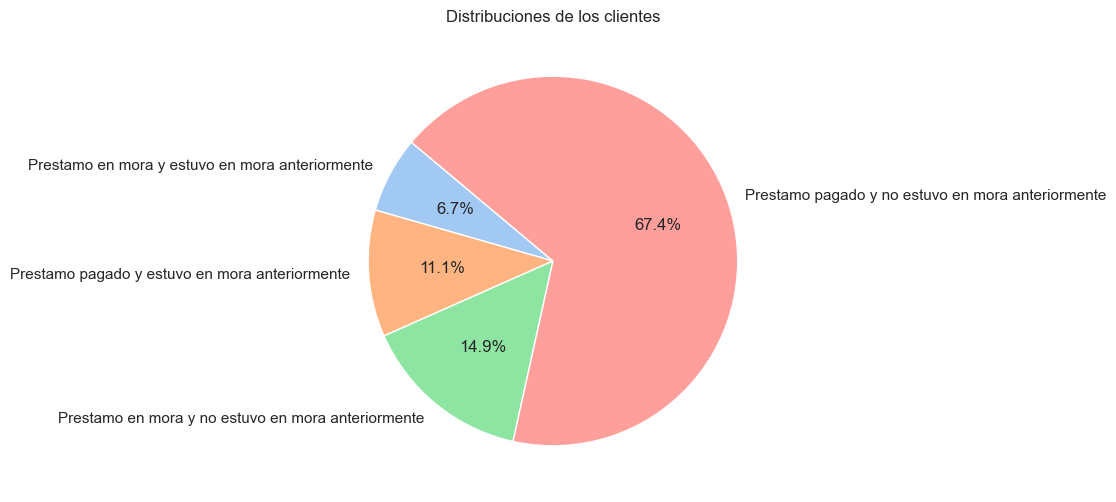

In [68]:
comb_1_Y = len(df_filtrado[(df_filtrado['loan_status'] == 1) & (df_filtrado['cb_person_default_on_file'] == 'Y')])
comb_0_Y = len(df_filtrado[(df_filtrado['loan_status'] == 0) & (df_filtrado['cb_person_default_on_file'] == 'Y')])
comb_1_N = len(df_filtrado[(df_filtrado['loan_status'] == 1) & (df_filtrado['cb_person_default_on_file'] == 'N')])
comb_0_N = len(df_filtrado[(df_filtrado['loan_status'] == 0) & (df_filtrado['cb_person_default_on_file'] == 'N')])

# Creamos una lista con los tamaños de cada sector
sizes = [comb_1_Y, comb_0_Y, comb_1_N, comb_0_N]

# Definimos las etiquetas para cada combinación
labels = [
    'Prestamo en mora y estuvo en mora anteriormente',
    'Prestamo pagado y estuvo en mora anteriormente',
    'Prestamo en mora y no estuvo en mora anteriormente',
    'Prestamo pagado y no estuvo en mora anteriormente'
]

# Creamos el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(sizes)))
plt.title("Distribuciones de los clientes")
plt.show()

In [120]:
filtered_df = df_filtrado[(df_filtrado['cb_person_default_on_file'] == 'N') & 
                          (df_filtrado['loan_status'] == 1) & 
                          (df_filtrado['loan_grade'] == 'A')]

# Obtener la cantidad de registros que cumplen las condiciones
cantidad = filtered_df.shape[0]

# Mostrar el resultado
print(f'Cantidad de registros: {cantidad}')

Cantidad de registros: 967


Index(['0-N', '0-Y', '1-N', '1-Y'], dtype='object')


<Figure size 1200x900 with 0 Axes>

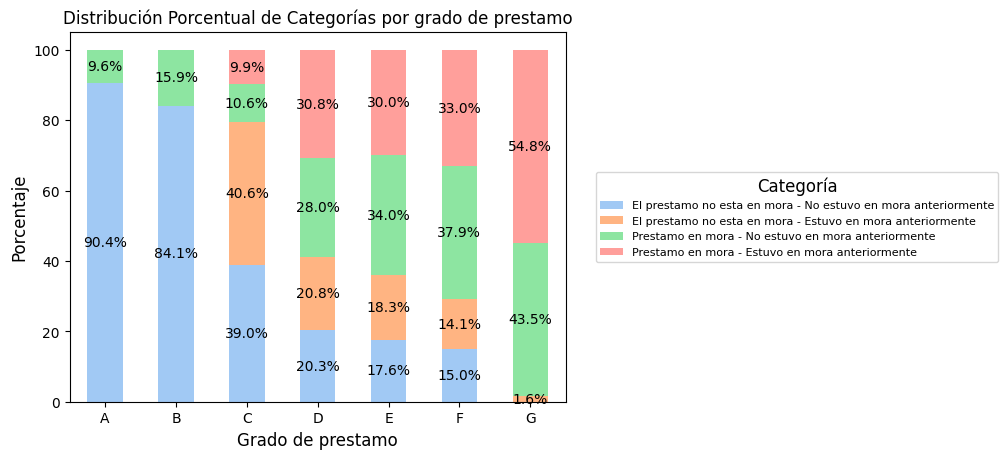

<Figure size 1000x600 with 0 Axes>

In [112]:
# Mapeo de etiquetas
label_map = {
    '0-N': 'El prestamo no esta en mora - No estuvo en mora anteriormente',
    '0-Y': 'El prestamo no esta en mora - Estuvo en mora anteriormente',
    '1-N': 'Prestamo en mora - No estuvo en mora anteriormente', 
    '1-Y': 'Prestamo en mora - Estuvo en mora anteriormente'
}

# Crear una columna combinada para facilitar el agrupamiento
categorias = df_filtrado['loan_status'].astype(str) + "-" + df_filtrado['cb_person_default_on_file']

# Agrupar por loan_grade y categoria
grouped = df_filtrado.groupby(['loan_grade', categorias]).size().unstack(fill_value=0)
print(grouped.columns)

# Renombrar columnas con etiquetas personalizadas
grouped.columns = [label_map[col] for col in grouped.columns]

# Calcular los porcentajes dentro de cada barra (loan_grade)
percentages = grouped.apply(lambda x: x / x.sum() * 100, axis=1)

# Paleta de colores pastel
pastel_colors = sns.color_palette("pastel")

# Configuración de la figura con un tamaño adecuado
plt.figure(figsize=(12, 9))

# Crear el gráfico de barras apiladas con colores pastel
ax = percentages.plot(kind='bar', stacked=True, color=pastel_colors)

# Añadir etiquetas de porcentaje
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 1 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Configurar etiquetas y título
plt.title('Distribución Porcentual de Categorías por grado de prestamo', fontsize=12)
plt.xlabel('Grado de prestamo', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)

# Rotar etiquetas del eje x a vertical
plt.xticks(rotation=0, fontsize=10)

plt.legend(title='Categoría', bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=8, title_fontsize=12)


plt.figure(figsize=(10, 6))  
plt.tight_layout(rect=[0, 0, 0.9, 1])  

# Mostrar la gráfica
plt.show()




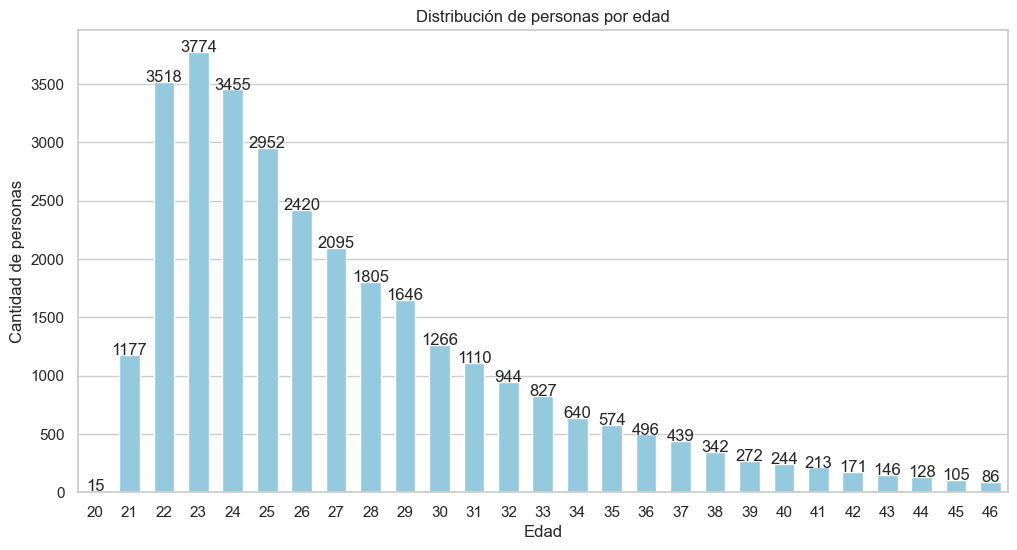

In [69]:
edad_counts = df_filtrado['person_age'].value_counts().sort_index()
sns.set(style="whitegrid")

# Creamos el gráfico de barras a partir de los conteos de edad con mayor separación
plt.figure(figsize=(12, 6))
sns.barplot(x=edad_counts.index, y=edad_counts.values, color="skyblue", width=0.6)  # width reducido para más espacio

# Añadimos etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de personas por edad")


# Ajustar los límites del eje x para dar más espacio
plt.xlim(-0.5, len(edad_counts) - 0.5)  # Ajusta los límites del eje x

# Añadimos etiquetas encima de cada barra para mostrar el valor
for index, value in enumerate(edad_counts.values):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')

plt.show()

C:\Users\alenm\AppData\Local\Temp\ipykernel_19696\3437893229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_grade_interest, x='loan_grade', y='loan_int_rate', palette='viridis')


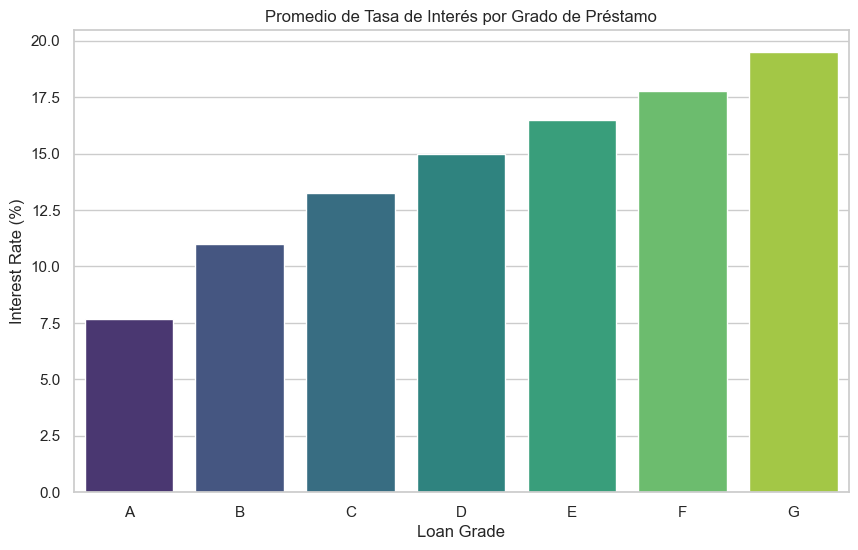

In [70]:
loan_grade_interest = df_filtrado.groupby('loan_grade')['loan_int_rate'].mean().reset_index()

# Visualizamos la relación con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_grade_interest, x='loan_grade', y='loan_int_rate', palette='viridis')
plt.title('Promedio de Tasa de Interés por Grado de Préstamo')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

In [71]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

In [72]:


label_encoder = LabelEncoder()
df_filtrado['loan_grade'] = label_encoder.fit_transform(df_filtrado['loan_grade'])
df_filtrado['cb_person_default_on_file'] = label_encoder.fit_transform(df_filtrado['cb_person_default_on_file'])




df_filtrado = pd.get_dummies(df_filtrado, columns=['person_home_ownership'])
df_filtrado = pd.get_dummies(df_filtrado, columns=['loan_intent'])



In [73]:
df_filtrado.head()

person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
1          21           9600                5.0           1       1000   
2          25           9600                1.0           2       5500   
3          23          65500                4.0           2      35000   
4          24          54400                8.0           2      35000   
5          21           9900                2.0           0       2500   

   loan_int_rate  loan_status  loan_percent_income  cb_person_default_on_file  \
1          11.14            0                 0.10                          0   
2          12.87            1                 0.57                          0   
3          15.23            1                 0.53                          0   
4          14.27            1                 0.55                          1   
5           7.14            1                 0.25                          0   

   cb_person_cred_hist_length  person_home_ownership_MORTGAGE  \
1                           2                           False   
2                           3                            True   
3                           2                           False   
4                           4                           False   
5                           2                           False   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
1                        False                       True   
2                        False                      False   
3                        False                      False   
4                        False                      False   
5                        False                       True   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
1                       False                          False   
2                       False                          False   
3                        True                          False   
4                        True                          False   
5                       False                          False   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
1                   True                        False                False   
2                  False                        False                 True   
3                  False                        False                 True   
4                  False                        False                 True   
5                  False                        False                False   

   loan_intent_PERSONAL  loan_intent_VENTURE  
1                 False                False  
2                 False                False  
3                 False                False  
4                 False                False  
5                 False                 True

In [74]:
X = df_filtrado.drop('loan_status', axis=1) 
y = df_filtrado['loan_status']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [76]:
# Escalar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-1.20081092 -0.71377137  0.36493578 ... -0.48013812 -0.44524956
  -0.46120475]
 [-0.62020082 -0.04139294  0.90196651 ... -0.48013812 -0.44524956
   2.1682344 ]
 [-0.81373752 -0.08094461 -0.70912569 ... -0.48013812  2.24593147
  -0.46120475]
 ...
 [-1.20081092 -1.02227441 -0.97764106 ... -0.48013812 -0.44524956
   2.1682344 ]
 [-0.62020082 -0.53578884 -0.70912569 ... -0.48013812 -0.44524956
  -0.46120475]
 [ 1.12162949 -0.42140541 -0.70912569 ... -0.48013812 -0.44524956
  -0.46120475]]


In [77]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [78]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3), #Desactiva al azar el 30% de las neuronas
    Dense(64, activation='relu'), 
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])




In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
#Detiene el entrenamiento cuando se separa la curva de validacion de la de entrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [81]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/50
676/676 [==============================] - 3s 3ms/step - loss: 0.3622 - accuracy: 0.8536 - val_loss: 0.3095 - val_accuracy: 0.8804
Epoch 2/50
676/676 [==============================] - 2s 2ms/step - loss: 0.3113 - accuracy: 0.8833 - val_loss: 0.2873 - val_accuracy: 0.8966
Epoch 3/50
676/676 [==============================] - 2s 2ms/step - loss: 0.2914 - accuracy: 0.8945 - val_loss: 0.2872 - val_accuracy: 0.9018
Epoch 4/50
676/676 [==============================] - 2s 3ms/step - loss: 0.2784 - accuracy: 0.9014 - val_loss: 0.2658 - val_accuracy: 0.9081
Epoch 5/50
676/676 [==============================] - 2s 2ms/step - loss: 0.2699 - accuracy: 0.9034 - val_loss: 0.2551 - val_accuracy: 0.9127
Epoch 6/50
676/676 [==============================] - 2s 3ms/step - loss: 0.2615 - accuracy: 0.9090 - val_loss: 0.2505 - val_accuracy: 0.9151
Epoch 7/50
676/676 [==============================] - 2s 3ms/step - loss: 0.2574 - accuracy: 0.9099 - val_loss: 0.2492 - val_accuracy: 0.9150
Epoch 

290/290 [==============================] - 1s 1ms/step
Exactitud del modelo en el conjunto de prueba: 0.92
Precisión: 0.95
Recall: 0.68
F1 Score: 0.79
Pérdida logarítmica: 0.23
AUC-ROC: 0.92
                 precision    recall  f1-score   support

No está en mora       0.92      0.99      0.95      7247
   Está en mora       0.95      0.68      0.79      2011

       accuracy                           0.92      9258
      macro avg       0.93      0.84      0.87      9258
   weighted avg       0.93      0.92      0.92      9258



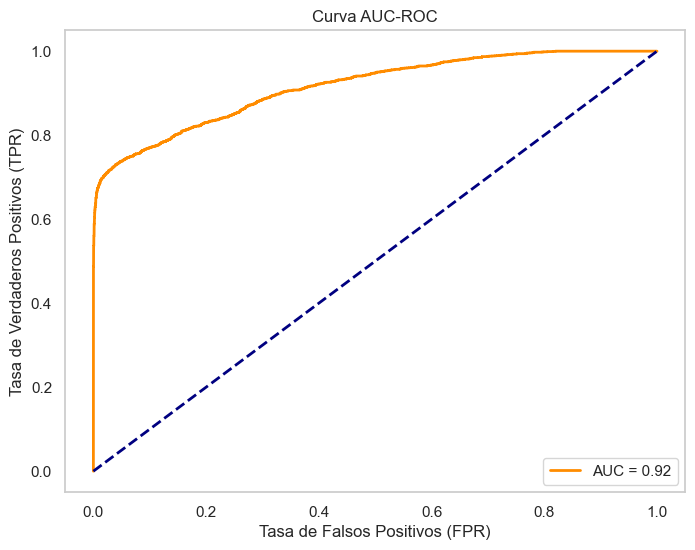

In [82]:
from sklearn.metrics import classification_report, roc_auc_score, log_loss, recall_score, f1_score, roc_curve

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calcular métricas
precision = classification_report(y_test, y_pred, output_dict=True)["1"]["precision"] #Sale del classification_report
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)
log_loss_value = log_loss(y_test, y_pred_prob)

# Mostrar resultados
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Pérdida logarítmica: {log_loss_value:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(classification_report(y_test,y_pred,target_names=['No está en mora', 'Está en mora']))


# Gráfica del AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Curva AUC-ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

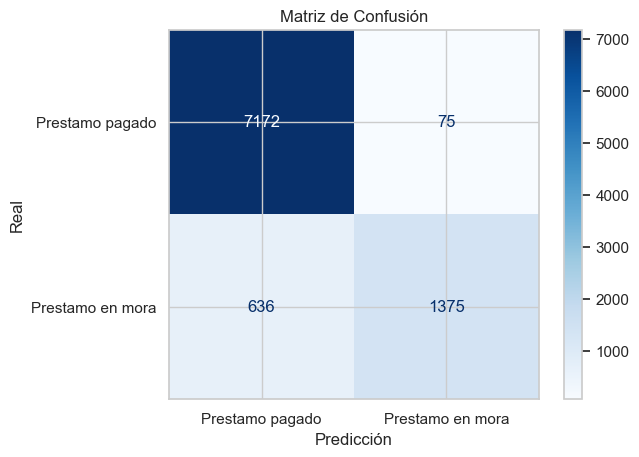

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Prestamo pagado', 'Prestamo en mora'])
disp.plot(cmap='Blues', values_format='d')  
plt.title("Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

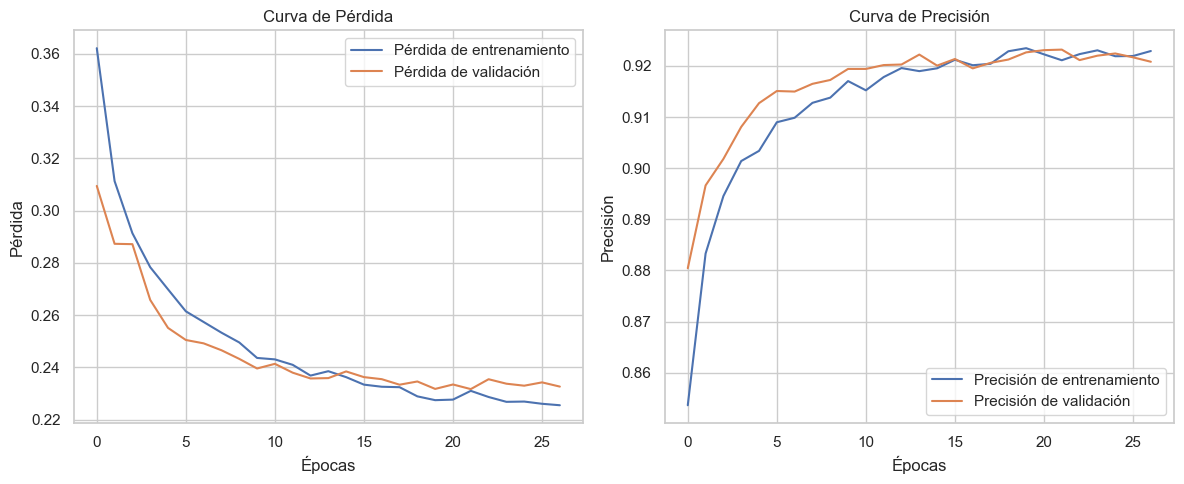

In [84]:
# Graficar la curva de aprendizaje
plt.figure(figsize=(12, 5))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [85]:
#model.save('red_neuronal.h5')

# SVM

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svc = SVC()

grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)





Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [95]:
from sklearn.svm import SVC  # Importa el clasificador SVM

svm_model = SVC(kernel='rbf', C=1) 

svm_model.fit(X_train, y_train)

SVC(C=1)

Exactitud del modelo en el conjunto de prueba: 0.92
Precisión: 0.93
Recall: 0.66
F1 Score: 0.77
Pérdida logarítmica: 3.03
AUC-ROC: 0.82
                 precision    recall  f1-score   support

No está en mora       0.91      0.99      0.95      7247
   Está en mora       0.93      0.66      0.77      2011

       accuracy                           0.92      9258
      macro avg       0.92      0.82      0.86      9258
   weighted avg       0.92      0.92      0.91      9258



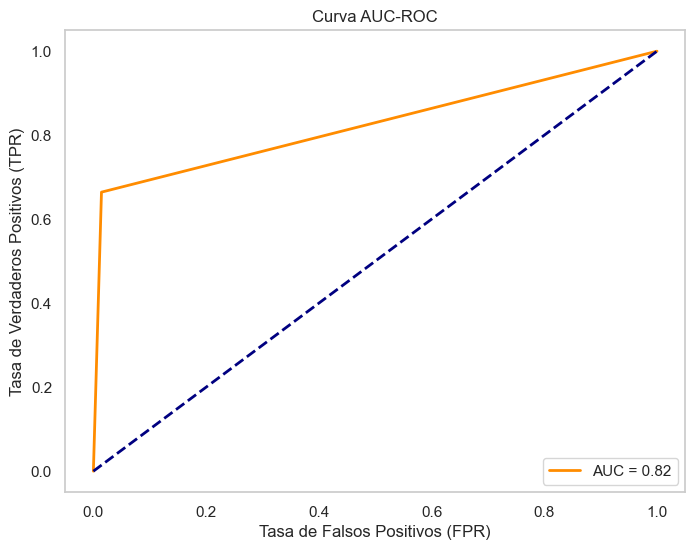

In [94]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Calcular métricas
precision = classification_report(y_test, y_pred, output_dict=True)["1"]["precision"] #Sale del classification_report
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred)

# Mostrar resultados
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Pérdida logarítmica: {log_loss_value:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(classification_report(y_test,y_pred,target_names=['No está en mora', 'Está en mora']))


# Gráfica del AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Curva AUC-ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


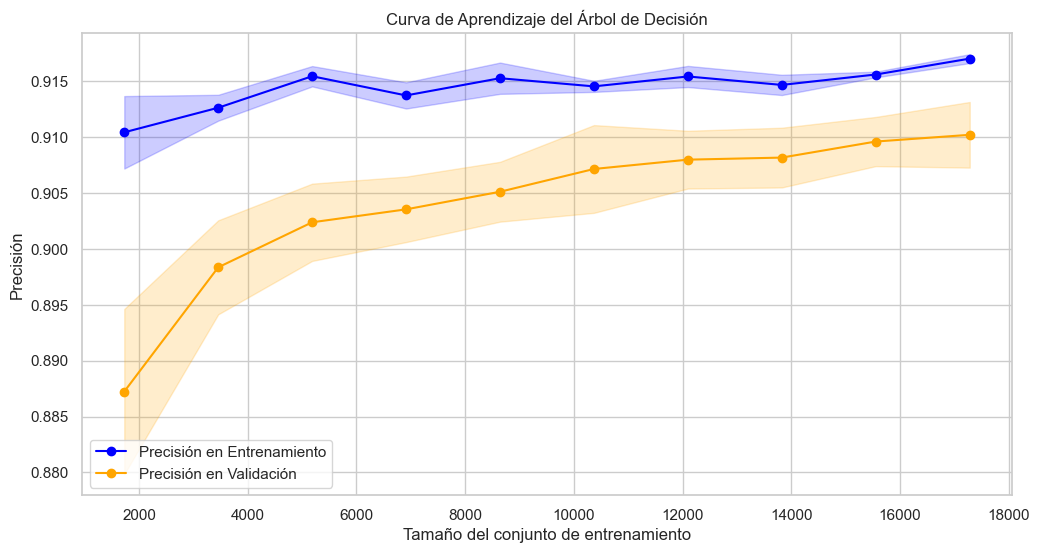

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear el modelo
svm_model = SVC(kernel='rbf', C=1)

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    svm_model,               # Tu modelo
    X_train,                # Datos de entrada
    y_train,                # Etiquetas de entrenamiento
    cv=5,                   # Validación cruzada (5 folds)
    scoring='accuracy',     # Métrica de evaluación
    train_sizes=np.linspace(0.1, 1.0, 10),  # Tamaños de muestra: 10% a 100% del conjunto de datos
    random_state=42
)
# Promedio y desviación estándar de las métricas
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Precisión en Entrenamiento', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Precisión en Validación', color='orange', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

# Configuración del gráfico
plt.title('Curva de Aprendizaje del Árbol de Decisión')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
error_generalizacion = np.abs(train_mean - test_mean)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, error_generalizacion, label='Error de Generalización', color='red', marker='o')
plt.title('Error de Generalización en función del Tamaño del Entrenamiento')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Diferencia entre Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.show()

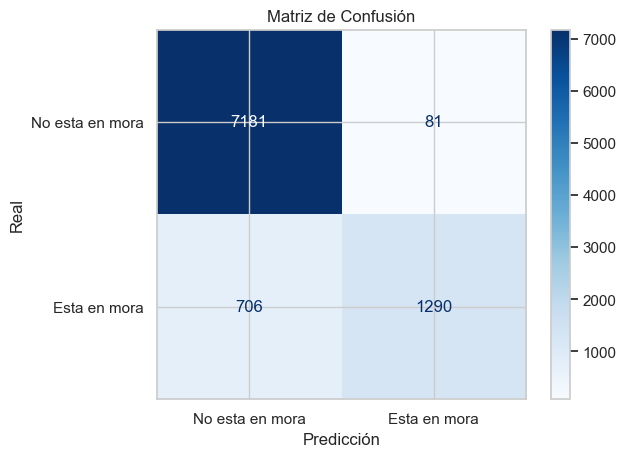

In [133]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No esta en mora', 'Esta en mora'])
disp.plot(cmap='Blues', values_format='d')  
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame original
df_encoded = df_filtrado.copy()

# Inicializar el codificador
label_encoder = LabelEncoder()

# Listar todas las columnas categóricas a codificar
categorical_columns = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file', 'loan_intent']

# Aplicar el codificador a cada columna categórica
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Ahora, seleccionamos solo las columnas numéricas
numerical_df = df_encoded.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_df = numerical_df.corr(method="pearson")

In [ ]:
# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_df)

In [ ]:
# Establecer un umbral de correlación
threshold = 0.5  # Cambia este valor según tus necesidades

# Filtrar las correlaciones significativas
significant_corr = corr_df[(corr_df.abs() > threshold) & (corr_df != 1.0)]
print("\nCorrelaciones significativas (por encima de 0.5):")
print(significant_corr)

In [ ]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Mapa de calor de correlación")
plt.show()